In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
gender_submission_data = pd.read_csv('gender_submission.csv')
titanic_data = pd.concat([train_data ,test_data ])

In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
test_data.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [5]:
print('train_data')
train_data.info()
print('_'*75+'\n')
print('test_data')
test_data.info()
print('_'*75+'\n')
print('The shape of the Train data is :-',train_data.shape)
print('The shape of the Test data is :-',test_data.shape)
print('the shape of the Gender Submission data is :-',gender_submission_data.shape)

train_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
___________________________________________________________________________

test_data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  

In [6]:
print('train_data')
display(train_data.isnull().sum())
print('_'*75+'\n')
print('test_data')
test_data.isnull().sum()

train_data


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

___________________________________________________________________________

test_data


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Survived
0    549
1    342
Name: count, dtype: int64


<Axes: xlabel='Survived', ylabel='count'>

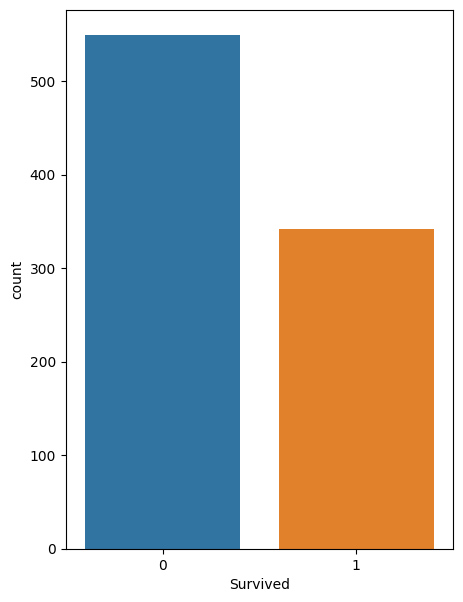

In [7]:
print(train_data.Survived.value_counts())
fig = plt.figure(figsize=(5,7))
sns.countplot(data  = train_data, x ='Survived')

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


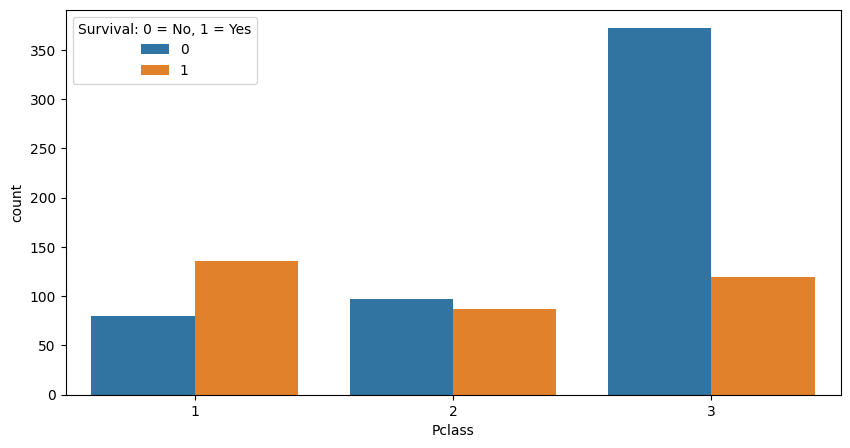

In [8]:
print(train_data[['Pclass' , 'Survived']].groupby(['Pclass']).mean())
fig = plt.figure(figsize=(10,5))
sns.countplot(data = train_data, x= 'Pclass', hue='Survived')
plt.legend(title= 'Survival: 0 = No, 1 = Yes' , loc = 'upper left')

      Sex  Survived
0  female  0.742038
1    male  0.188908


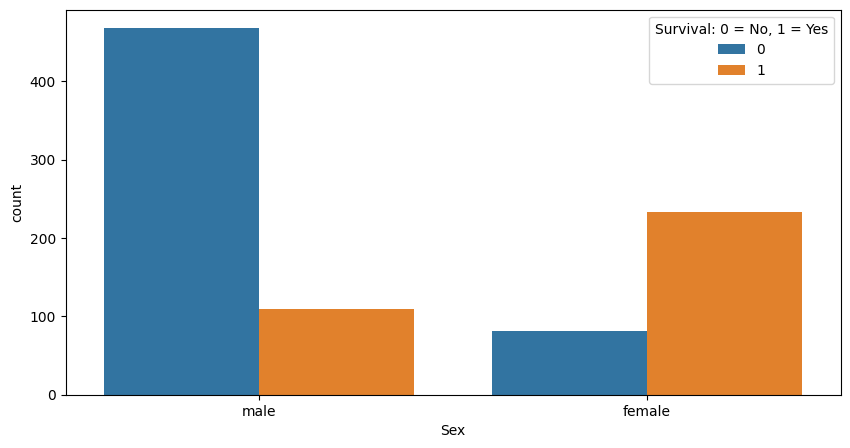

In [9]:
print(train_data[['Sex' , 'Survived']].groupby(['Sex'],as_index=False).mean())
fig = plt.figure(figsize=(10,5))
sns.countplot(data= train_data, x='Sex', hue='Survived')
plt.legend(title= 'Survival: 0 = No, 1 = Yes' , loc = 'upper right')

  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.336957


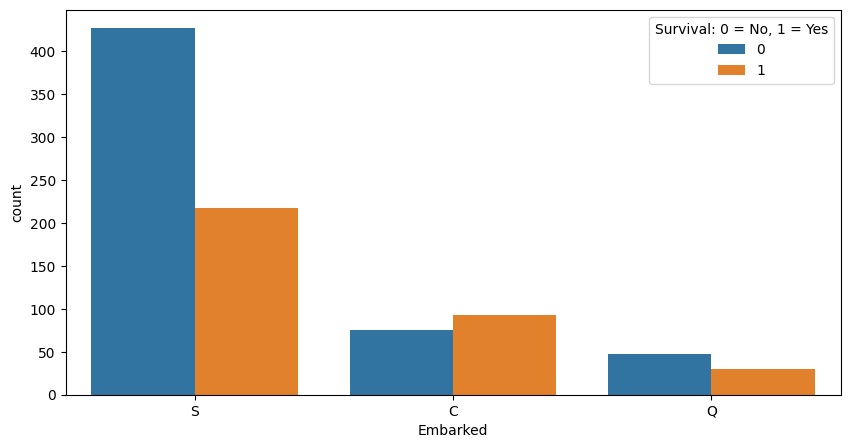

In [10]:
print(train_data[['Embarked' , 'Survived']].groupby(['Embarked'],as_index=False).mean())
fig = plt.figure(figsize=(10,5))
sns.countplot(data= train_data, x='Embarked', hue='Survived')
plt.legend(title= 'Survival: 0 = No, 1 = Yes' , loc = 'upper right')

   Parch  Survived
3      3  0.600000
1      1  0.550847
2      2  0.500000
0      0  0.343658
5      5  0.200000
4      4  0.000000
6      6  0.000000


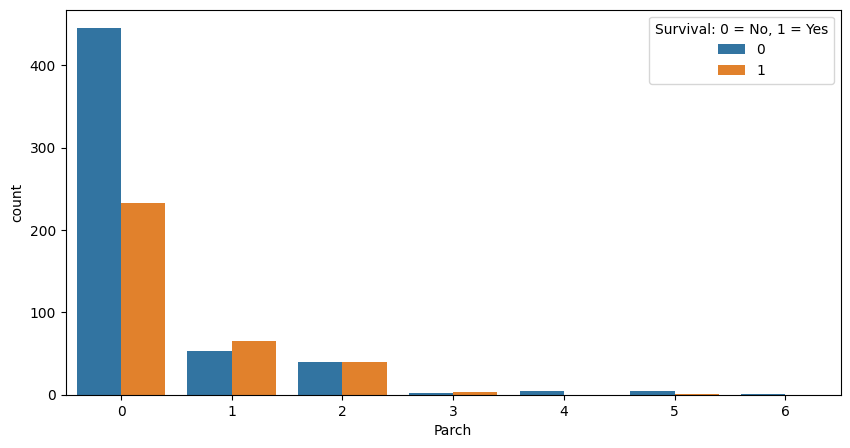

In [11]:
print(train_data[['Parch' , 'Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by='Survived', ascending=False))
fig = plt.figure(figsize=(10,5))
sns.countplot(data= train_data, x='Parch', hue='Survived')
plt.legend(title= 'Survival: 0 = No, 1 = Yes' , loc = 'upper right')

   SibSp  Survived
1      1  0.535885
2      2  0.464286
0      0  0.345395
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000


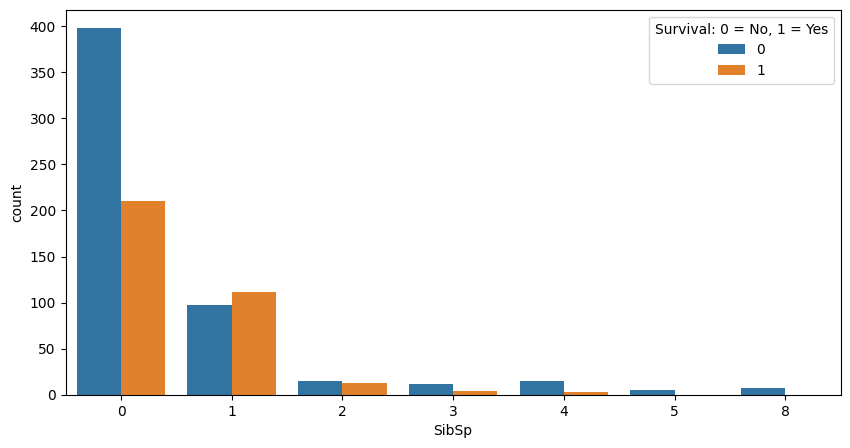

In [12]:
print(train_data[['SibSp' , 'Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by='Survived',ascending=False))
fig = plt.figure(figsize=(10,5))
sns.countplot(data= train_data, x='SibSp', hue='Survived')
plt.legend(title= 'Survival: 0 = No, 1 = Yes' , loc = 'upper right')

   Survived       Fare
0         0  22.117887
1         1  48.395408


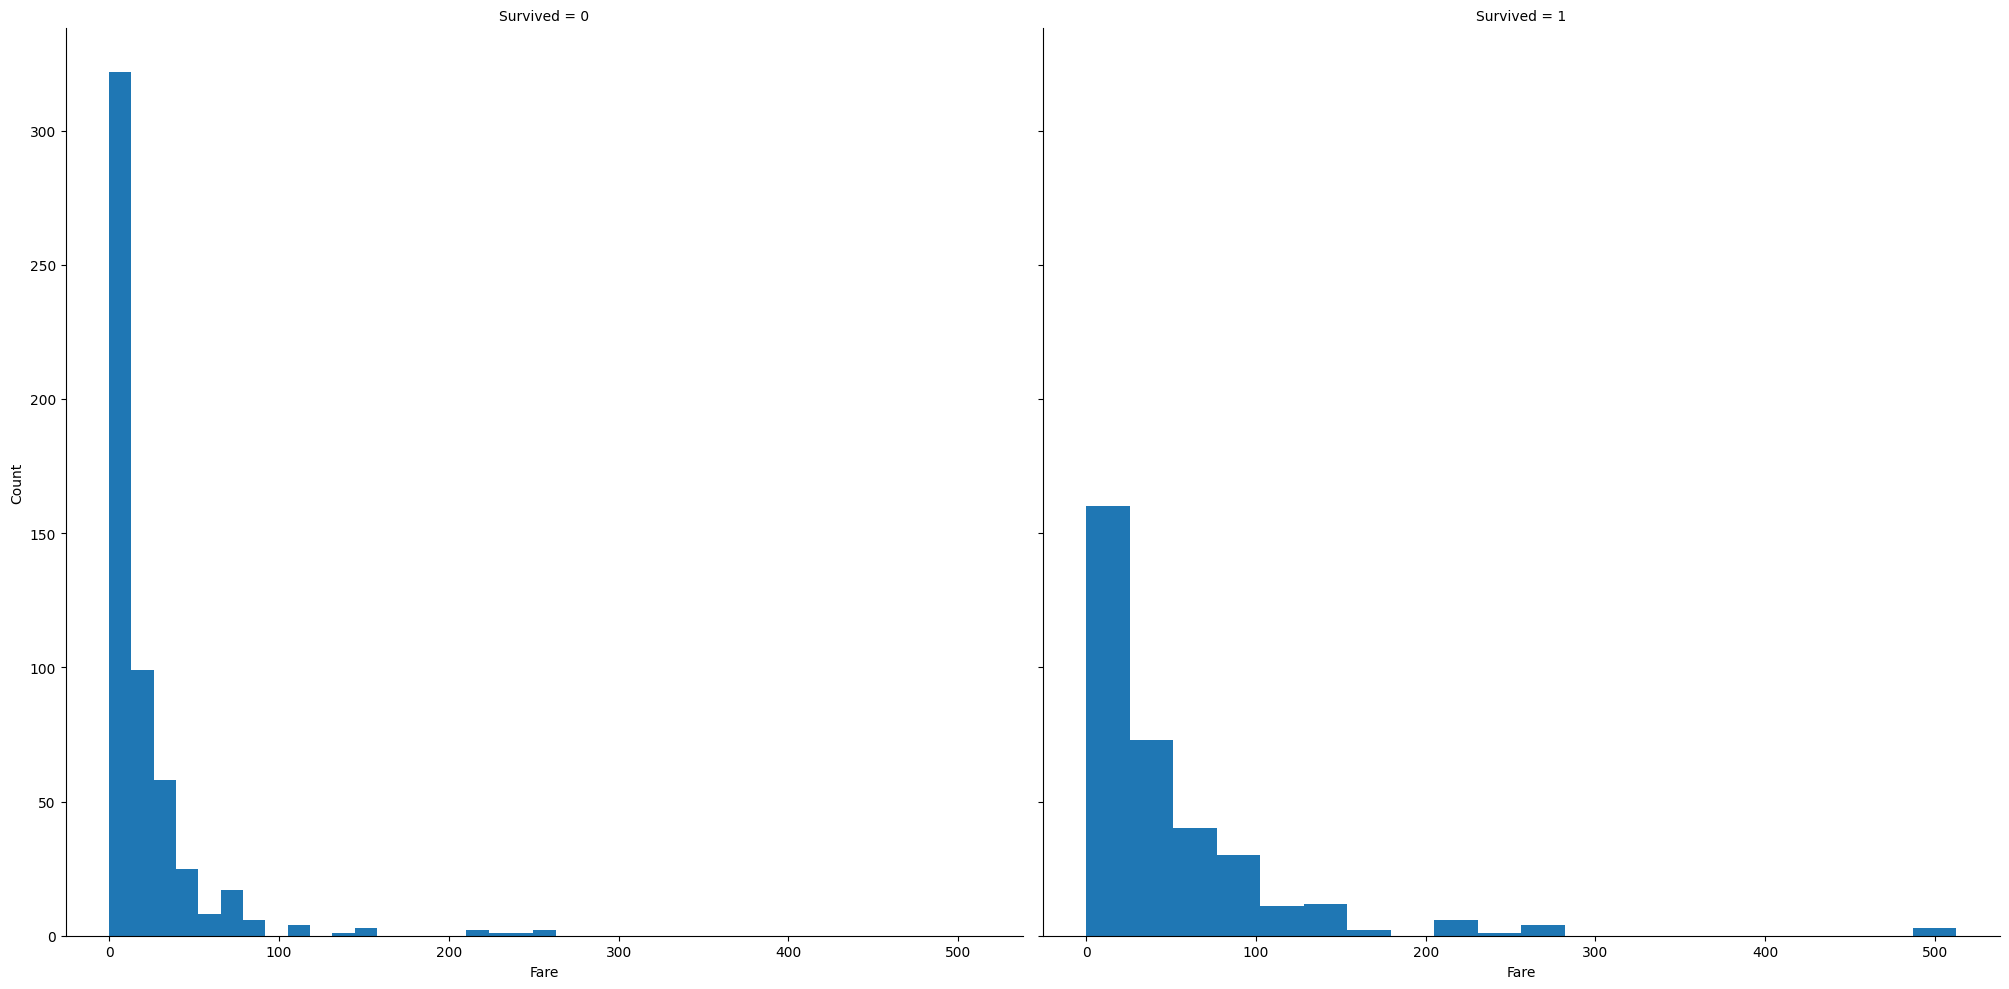

In [13]:
print(train_data[['Fare' , 'Survived']].groupby(['Survived'],as_index=False).mean())
fig = sns.FacetGrid(train_data , col= 'Survived', height=10)
fig.map(plt.hist, 'Fare',bins=20)
fig.set_ylabels('Count')

                Age
Survived           
0         30.626179
1         28.343690


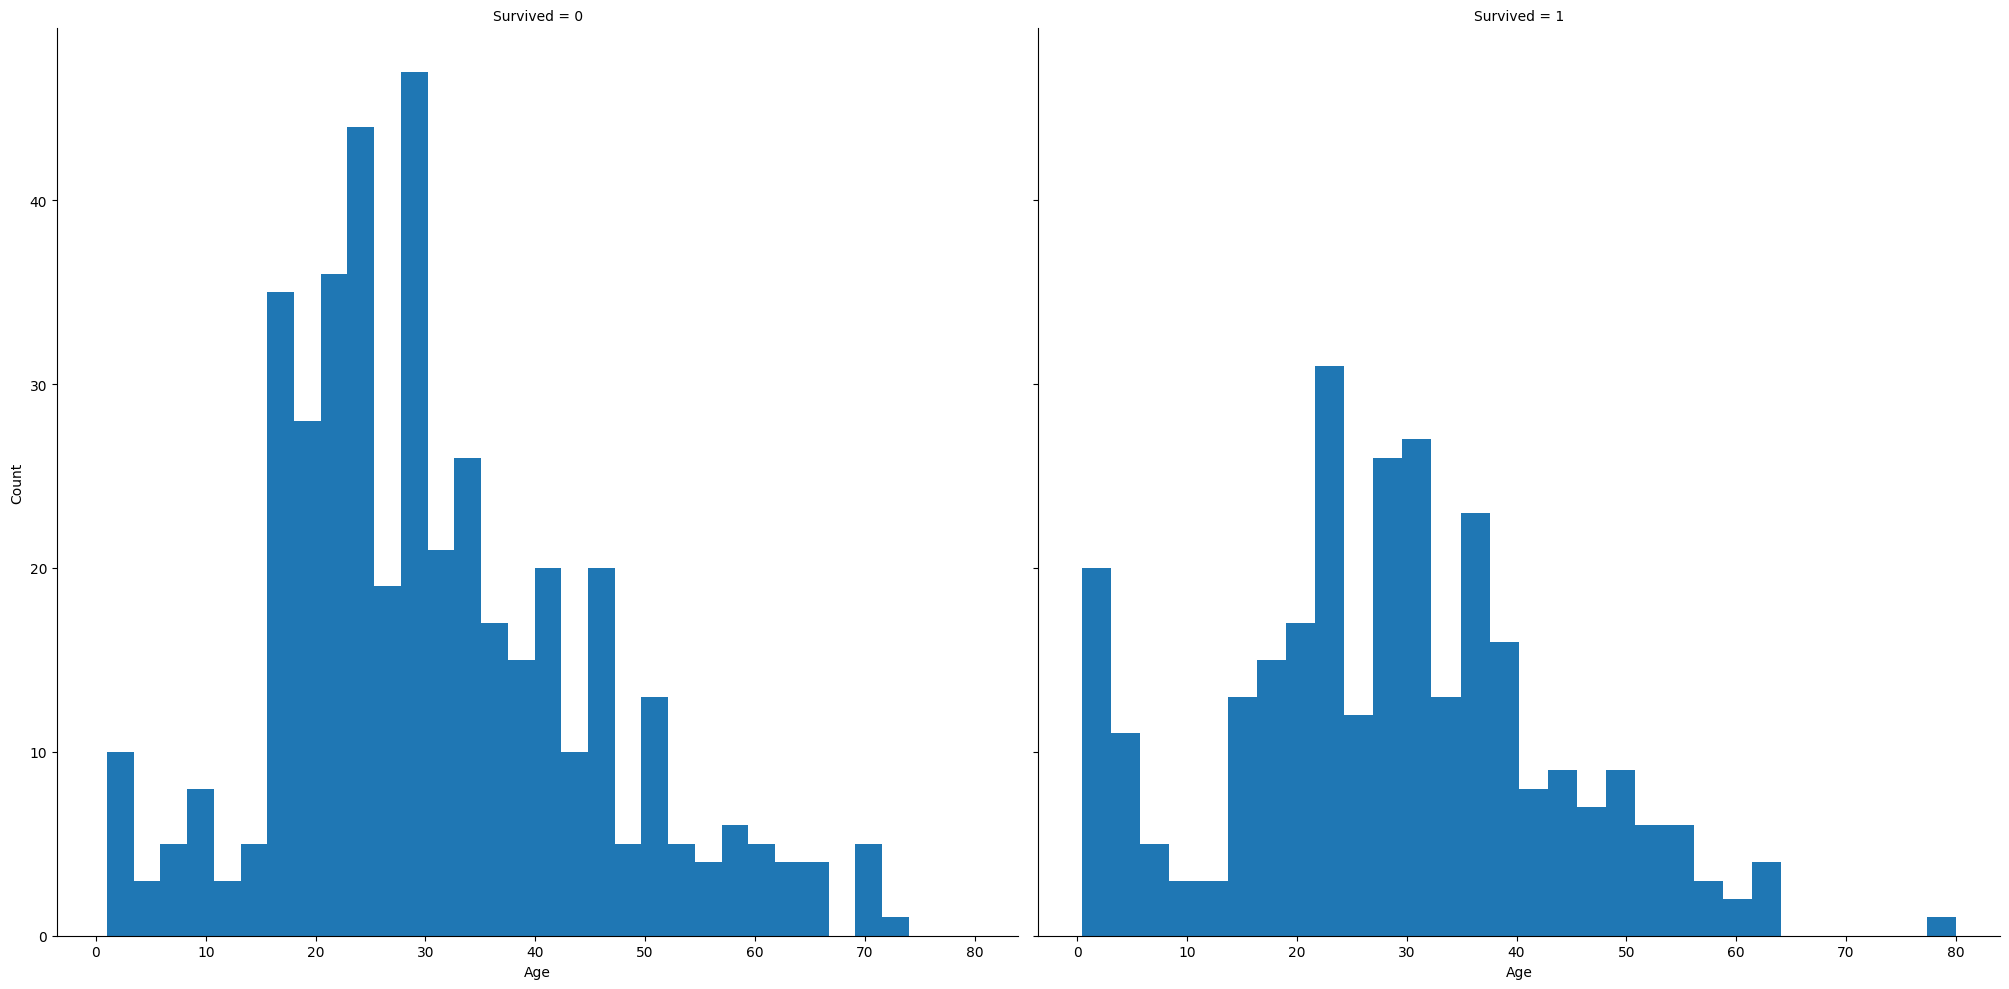

In [14]:
print(train_data[['Age' , 'Survived']].groupby(['Survived'],as_index=True).mean())
fig = sns.FacetGrid(train_data , col= 'Survived', height=10)
fig.map(plt.hist, 'Age',bins=30)
fig.set_ylabels('Count')

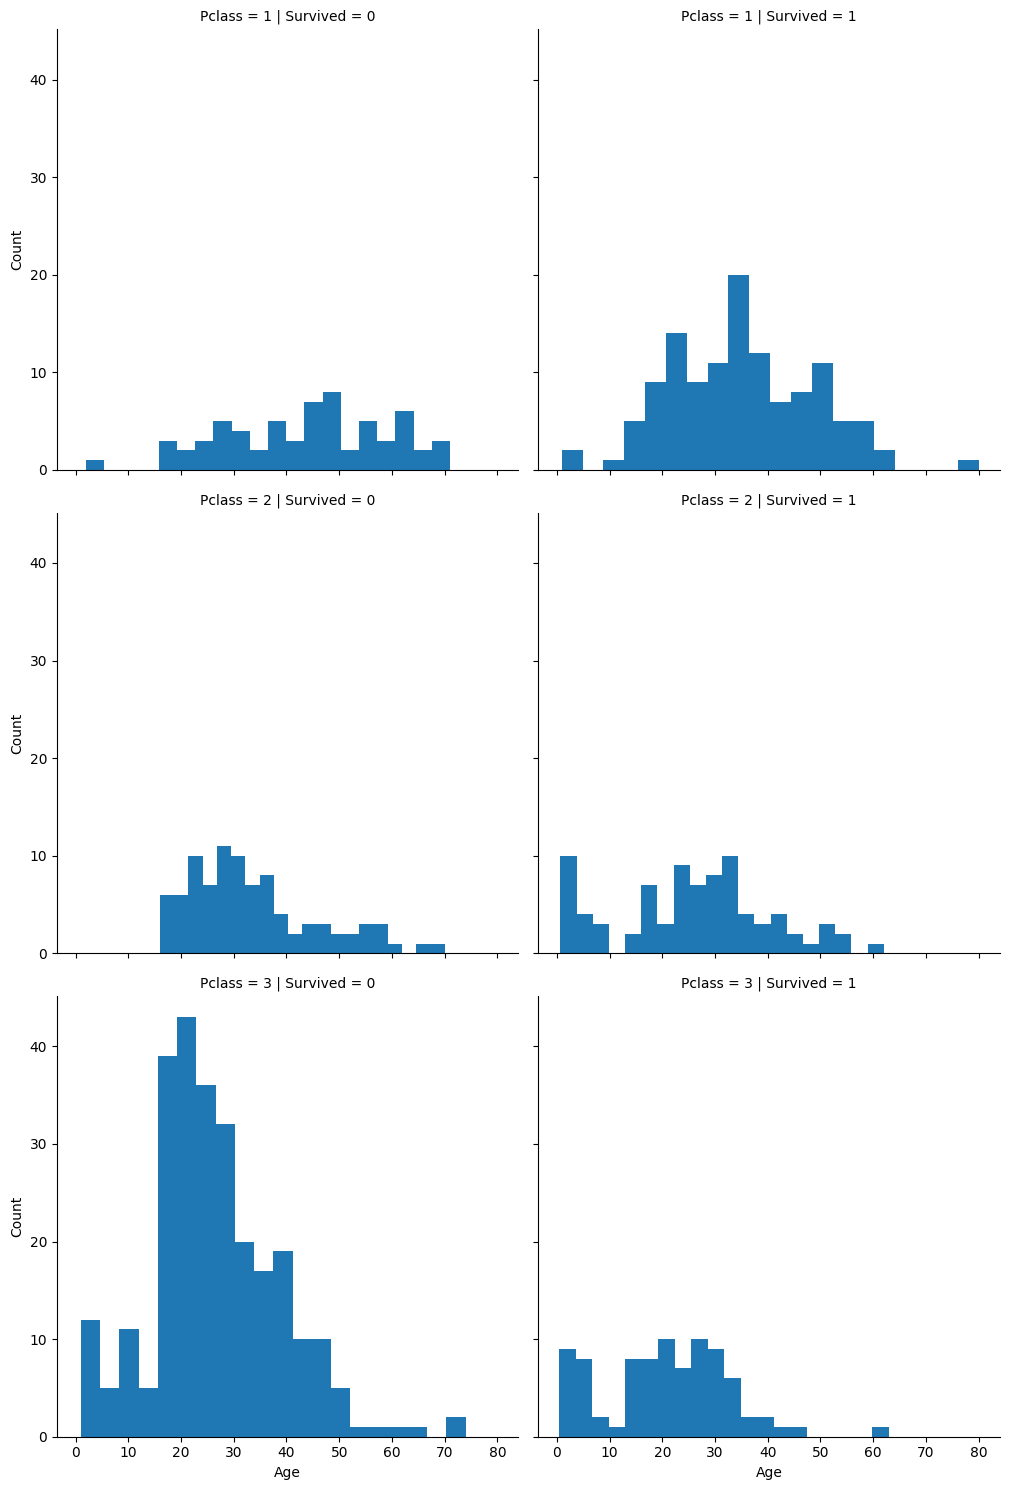

In [15]:
fig = sns.FacetGrid(train_data , col= 'Survived', row= 'Pclass' ,height=5)
fig.map(plt.hist, 'Age',bins=20)
fig.set_ylabels('Count')

In [16]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [17]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [18]:
display(titanic_data.isnull().sum())
titanic_data.shape

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

(1309, 12)

In [19]:
titanic_data.drop('Cabin' , axis=1 , inplace=True)

In [20]:
titanic_data['Age'].fillna(titanic_data['Age'].dropna().median() , inplace=True)
titanic_data['Fare'].fillna(titanic_data['Fare'].dropna().median() , inplace=True)
# dropping the two missing values in Embarked column

titanic_data.dropna(subset = ['Embarked'], inplace=True)
# displaying the shape of all data sets

display(train_data.shape)
display(test_data.shape)
display(titanic_data.shape)

titanic_data.isna().sum()

(891, 12)

(418, 11)

(1307, 11)

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [21]:
titanic_data['Sex'] = titanic_data['Sex'].map({'male':1 , 'female':0})
titanic_data['Embarked'] = titanic_data['Embarked'].map({'C':0 , 'Q':1 , 'S':2})
titanic_data[['Sex' , 'Embarked']].head()

,Sex,Embarked
0,1,2
1,0,0
2,0,2
3,0,2
4,1,2


In [22]:
titanic_data.drop('Name', axis=1, inplace=True)
titanic_data.drop('Ticket', axis=1, inplace=True)
titanic_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0.0,3,1,22.0,1,0,7.2500,2
1,2,1.0,1,0,38.0,1,0,71.2833,0
2,3,1.0,3,0,26.0,0,0,7.9250,2
3,4,1.0,1,0,35.0,1,0,53.1000,2
4,5,0.0,3,1,35.0,0,0,8.0500,2


In [23]:
titanic_data['Fare'] = pd.cut(titanic_data['Fare'] , 5)
titanic_data['Age'] = pd.cut(titanic_data['Age'] , 5)
titanic_data[['Age' , 'Fare']]

,Age,Fare
0,"(16.136, 32.102]","(-0.512, 102.466]"
1,"(32.102, 48.068]","(-0.512, 102.466]"
2,"(16.136, 32.102]","(-0.512, 102.466]"
3,"(32.102, 48.068]","(-0.512, 102.466]"
4,"(32.102, 48.068]","(-0.512, 102.466]"
...,...,...
413,"(16.136, 32.102]","(-0.512, 102.466]"
414,"(32.102, 48.068]","(102.466, 204.932]"
415,"(32.102, 48.068]","(-0.512, 102.466]"
416,"(16.136, 32.102]","(-0.512, 102.466]"


In [24]:
Pclass_dummy = pd.get_dummies(titanic_data['Pclass'],prefix='Pclass')
Age_dummy = pd.get_dummies(titanic_data['Age'],prefix='Age')
SibSp_dummy = pd.get_dummies(titanic_data['SibSp'],prefix='SibSp')
Parch_dummy = pd.get_dummies(titanic_data['Parch'],prefix='Parch')
Fare_dummy = pd.get_dummies(titanic_data['Fare'],prefix='Fare')
Embarked_dummy = pd.get_dummies(titanic_data['Embarked'],prefix='Embarked')

titanic_dummies = pd.concat([Pclass_dummy ,Age_dummy  , SibSp_dummy , Parch_dummy , Fare_dummy , Embarked_dummy] ,  axis = 1 )
# checking for the shape and the null values 

titanic_dummies.isnull().sum() , titanic_dummies.shape

(Pclass_1                   0
 Pclass_2                   0
 Pclass_3                   0
 Age_(0.0902, 16.136]       0
 Age_(16.136, 32.102]       0
 Age_(32.102, 48.068]       0
 Age_(48.068, 64.034]       0
 Age_(64.034, 80.0]         0
 SibSp_0                    0
 SibSp_1                    0
 SibSp_2                    0
 SibSp_3                    0
 SibSp_4                    0
 SibSp_5                    0
 SibSp_8                    0
 Parch_0                    0
 Parch_1                    0
 Parch_2                    0
 Parch_3                    0
 Parch_4                    0
 Parch_5                    0
 Parch_6                    0
 Parch_9                    0
 Fare_(-0.512, 102.466]     0
 Fare_(102.466, 204.932]    0
 Fare_(204.932, 307.398]    0
 Fare_(307.398, 409.863]    0
 Fare_(409.863, 512.329]    0
 Embarked_0                 0
 Embarked_1                 0
 Embarked_2                 0
 dtype: int64,
 (1307, 31))

In [25]:
full_data = pd.concat([titanic_data , titanic_dummies] , axis=1)
full_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pclass_1,...,Parch_6,Parch_9,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_0,Embarked_1,Embarked_2
0,1,0.0,3,1,"(16.136, 32.102]",1,0,"(-0.512, 102.466]",2,False,...,False,False,True,False,False,False,False,False,False,True
1,2,1.0,1,0,"(32.102, 48.068]",1,0,"(-0.512, 102.466]",0,True,...,False,False,True,False,False,False,False,True,False,False
2,3,1.0,3,0,"(16.136, 32.102]",0,0,"(-0.512, 102.466]",2,False,...,False,False,True,False,False,False,False,False,False,True
3,4,1.0,1,0,"(32.102, 48.068]",1,0,"(-0.512, 102.466]",2,True,...,False,False,True,False,False,False,False,False,False,True
4,5,0.0,3,1,"(32.102, 48.068]",0,0,"(-0.512, 102.466]",2,False,...,False,False,True,False,False,False,False,False,False,True


In [26]:
full_data.drop(['Pclass' ,'Age','SibSp', 'Parch', 'Fare' , 'Embarked' , 'PassengerId'] , axis=1 , inplace=True)
full_data.head()

,Survived,Sex,Pclass_1,Pclass_2,Pclass_3,"Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80.0]",...,Parch_6,Parch_9,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_0,Embarked_1,Embarked_2
0,0.0,1,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,1.0,0,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
2,1.0,0,False,False,True,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
3,1.0,0,True,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True
4,0.0,1,False,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,True


In [27]:
import math, time ,random , datetime
from sklearn.model_selection import train_test_split
from sklearn import model_selection , metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [28]:
new_train = full_data.iloc[0 : -(test_data.shape[0]), : ]
new_test = full_data.iloc[-(test_data.shape[0]) : , : ]
X_train = new_train.drop('Survived', axis=1)
Y_train = new_train.Survived

new_test = new_test.drop('Survived', axis=1)
# checking the shape of the new train and test data

X_train.shape, Y_train.shape, new_test.shape

((889, 32), (889,), (418, 32))

In [29]:
def acc_algo(algo, X_train, Y_train, cv):
    
    model = algo.fit(X_train,Y_train)
    accuracy= round(model.score(X_train,Y_train) *100  , 2)
    
    #cross Validation
    train_pred = model_selection.cross_val_predict(algo,
                                                  X_train,Y_train,
                                                  cv = cv , n_jobs = -1)
    #cross-validation Acc metric
    acc_cross_valid = round(metrics.accuracy_score(Y_train , train_pred) *100, 2)
    
    return accuracy, acc_cross_valid

In [30]:
acc_dt, acc_cv_dt = acc_algo(DecisionTreeClassifier(), X_train, Y_train, 10)
print('Accuracy: ', acc_dt)
print("Accuracy CV 10-fold" , acc_cv_dt)

Accuracy:  87.18
Accuracy CV 10-fold 80.88


In [33]:
acc_gbc , acc_cv_gbc = acc_algo(GradientBoostingClassifier() ,
                                                    X_train, Y_train ,
                                                    10)
print('Accuracy: ', acc_gbc)
print("Accuracy CV 10-fold" , acc_cv_gbc)

Accuracy:  84.59
Accuracy CV 10-fold 81.44


In [35]:
acc_lr, acc_cv_lr = acc_algo(LogisticRegression(), 
                            X_train, Y_train,
                            10)
print('Accuracy:', acc_lr)
print("Accuracy CV 10-fold:", acc_cv_lr)

Accuracy: 81.66
Accuracy CV 10-fold: 79.53


In [37]:
pred_models = pd.DataFrame({
     'Model': [ 'Logistic Regression', 'Decision Tree', 'Gradient Boosting Classifier'],
    'Score': [ acc_lr, acc_dt, acc_gbc]
})
print("Accuracy Scores")
pred_models.sort_values(by='Score', ascending=False)

Accuracy Scores


,Model,Score
1,Decision Tree,87.18
2,Gradient Boosting Classifier,84.59
0,Logistic Regression,81.66


In [38]:
cross_valid_models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Trees', 'Gradient Boosting Classifier'],
    'Score': [ acc_dt, acc_gbc, acc_lr]
})
print("Cross Validation Accuracy Scores")
cross_valid_models.sort_values(by='Score', ascending=False)

Cross Validation Accuracy Scores


,Model,Score
0,Logistic Regression,87.18
1,Decision Trees,84.59
2,Gradient Boosting Classifier,81.66


In [39]:
gbc_base_model = GradientBoostingClassifier(learning_rate=0.1,
                                            n_estimators=100,
                                            max_depth=3,
                                            max_features='sqrt')

In [40]:
param_grid = {'learning_rate':[0.1,0.05,0.15],
              'n_estimators':[100,250,500] , 
              'max_depth':[3,4,5],
             'max_features': ['auto','sqrt']}

tuning = GridSearchCV(gbc_base_model , param_grid = param_grid , cv = 5 , verbose = True, n_jobs = -1 )
tuning.fit(X_train,Y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


C:\Users\shrut\Downloads\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
135 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
86 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\shrut\Downloads\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\shrut\Downloads\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\shrut\Downloads\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\shrut\Downloads\Lib\site-package

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(max_features='sqrt'),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.05, 0.15],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [100, 250, 500]},
             verbose=True)

In [41]:
print('Best Score: ' + str(tuning.best_score_))
print('Best Parameters: ' + str(tuning.best_params_))

Best Score: 0.818923379673713
Best Parameters: {'learning_rate': 0.05, 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 250}


In [42]:
gbc_model = GradientBoostingClassifier(learning_rate=0.1,
                                           n_estimators=250,
                                           max_depth=3,
                                           max_features='sqrt')
gbc_best_model = gbc_model.fit(X_train, Y_train)
accuracy = round(gbc_best_model.score(X_train,Y_train)*100 , 2)

train_prediction = model_selection.cross_val_predict(gbc_best_model,
                                                    X_train,Y_train,
                                                    cv=10 , n_jobs=-1)

acc_cross_valid = round(metrics.accuracy_score(Y_train , train_prediction) *100, 2)
print(acc_cross_valid)

82.34


In [43]:
gbc_model.feature_importances_

array([0.48545329, 0.05090027, 0.01376117, 0.15217407, 0.05423344,
       0.00628956, 0.01003841, 0.00666838, 0.00592867, 0.01852769,
       0.03180617, 0.00468009, 0.01360432, 0.00661116, 0.00427038,
       0.00473153, 0.01757767, 0.01197604, 0.00983955, 0.00343781,
       0.00551275, 0.00208262, 0.00106453, 0.        , 0.00322154,
       0.01087137, 0.00362929, 0.        , 0.00622079, 0.02569161,
       0.01150204, 0.01769378])

,imp,col
4,0.054233,"Age_(0.0902, 16.136]"
1,0.050900,Pclass_1
10,0.031806,SibSp_1
29,0.025692,Embarked_0
9,0.018528,SibSp_0
31,0.017694,Embarked_2
16,0.017578,Parch_0
2,0.013761,Pclass_2
12,0.013604,SibSp_3
17,0.011976,Parch_1


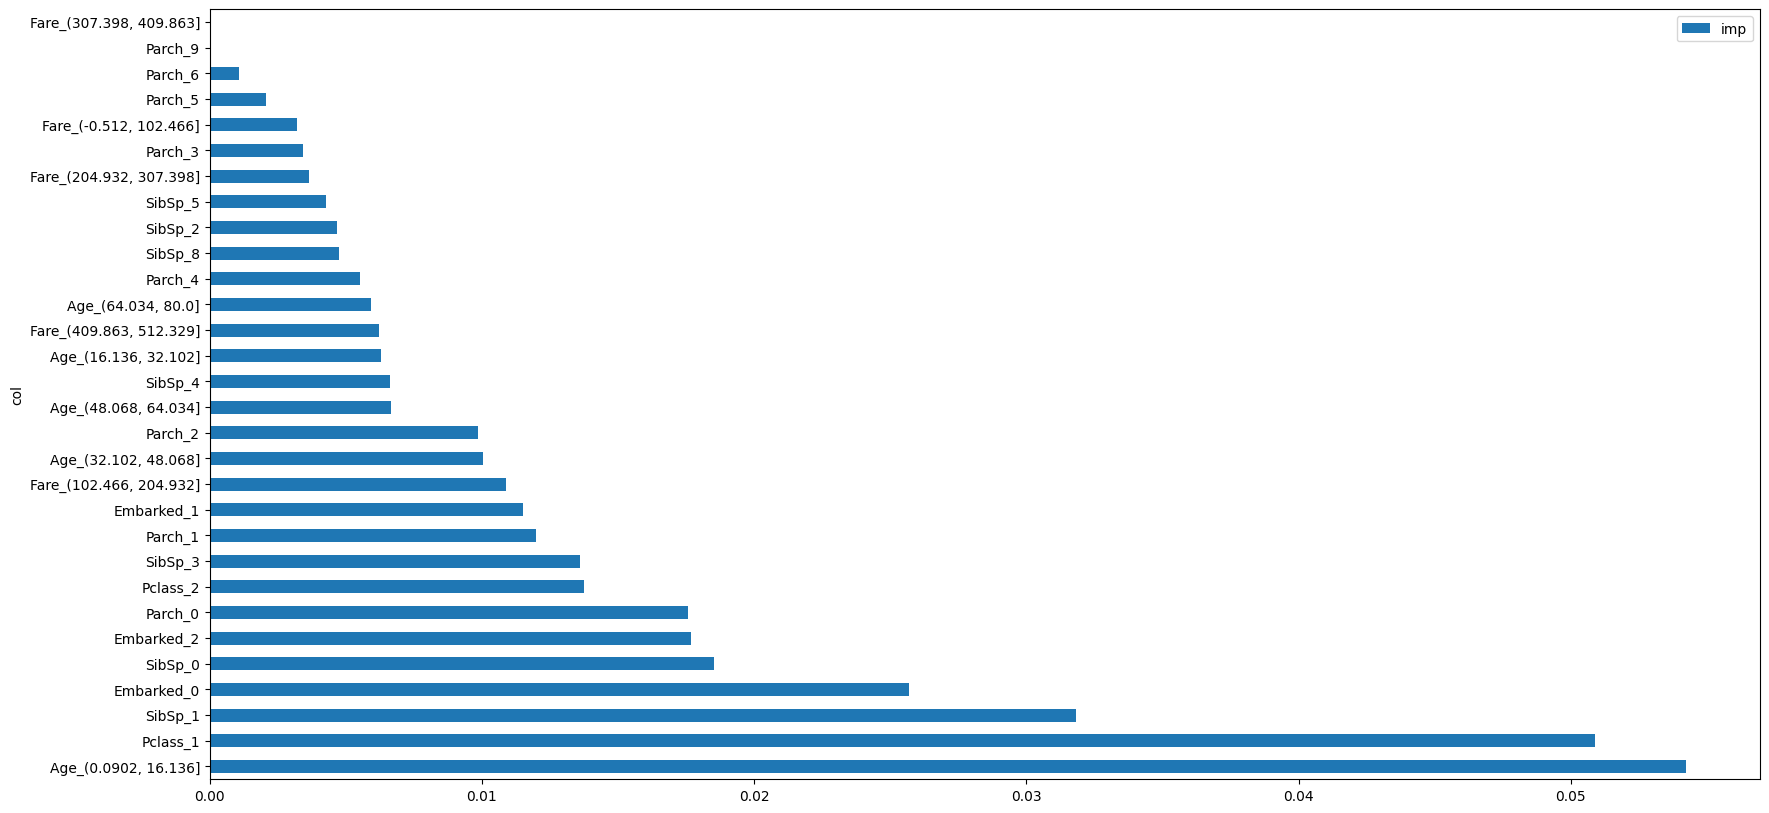

In [44]:
def feature_importance(model, data):
 
    fea_imp = pd.DataFrame({'imp': model.feature_importances_, 'col': data.columns})
    fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[False, False]).iloc[-30:]
    _ = fea_imp.plot(kind='barh', x='col', y='imp' , figsize=(20, 10))
    return fea_imp
feature_importance(gbc_model, X_train)

In [45]:
new_test

,Sex,Pclass_1,Pclass_2,Pclass_3,"Age_(0.0902, 16.136]","Age_(16.136, 32.102]","Age_(32.102, 48.068]","Age_(48.068, 64.034]","Age_(64.034, 80.0]",SibSp_0,...,Parch_6,Parch_9,"Fare_(-0.512, 102.466]","Fare_(102.466, 204.932]","Fare_(204.932, 307.398]","Fare_(307.398, 409.863]","Fare_(409.863, 512.329]",Embarked_0,Embarked_1,Embarked_2
0,1,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,True,False
1,0,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,1,False,True,False,False,False,False,True,False,True,...,False,False,True,False,False,False,False,False,True,False
3,1,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4,0,False,False,True,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
414,0,True,False,False,False,False,True,False,False,True,...,False,False,False,True,False,False,False,True,False,False
415,1,False,False,True,False,False,True,False,False,True,...,False,False,True,False,False,False,False,False,False,True
416,1,False,False,True,False,True,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True


In [46]:
pred = gbc_best_model.predict(new_test)
pred[:10]

array([0., 0., 0., 0., 0., 0., 1., 0., 1., 0.])

In [47]:
# Predicting the Survival using relevant columns

predictions = pd.DataFrame()
predictions['PassengerId'] = test_data['PassengerId']
predictions['Survived'] = pred.astype(int)
predictions.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [48]:
predictions['Survived'].value_counts()

Survived
0    271
1    147
Name: count, dtype: int64

In [49]:
from sklearn.metrics import confusion_matrix

con_mat = confusion_matrix(gender_submission_data['Survived'], predictions['Survived'])
con_mat

array([[247,  19],
       [ 24, 128]], dtype=int64)

In [50]:
precision = round(metrics.precision_score(gender_submission_data['Survived'], predictions['Survived']) *100, 2)
recall =  round(metrics.recall_score(gender_submission_data['Survived'] , predictions['Survived'] ) *100, 2)
acc =  round(metrics.accuracy_score(gender_submission_data['Survived'] , predictions['Survived'] ) *100, 2)

print('Precision :' ,precision )
print('Recall :' ,recall )
print('Acc :' ,acc )

Precision : 87.07
Recall : 84.21
Acc : 89.71
